In [1]:
# Dependencies and Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from citipy import citipy
from datetime import datetime
import seaborn as sns
import json
import openweathermapy.core as owm
from pprint import pprint

#import API key
from config import api_key

In [2]:
# Create empty data frame and add columns for city, country, latitude and longitude
cities_df = pd.DataFrame()
cities_df["City"] = ""
cities_df["Country"] = ""

# Randomly generate numbers for latitude and longitude and loop through 500 times
cities_df["Lat"] = [np.random.uniform(-90, 90) for x in range(1500)]
cities_df["Lng"] = [np.random.uniform(-180, 180) for x in range(1500)]

# Use latitude and longitude to find city and country by using interrows and citipy
for index, row in cities_df.iterrows():
    lat = row["Lat"]
    lng = row["Lng"]
    cities_df.set_value(index, "City", citipy.nearest_city(lat, lng).city_name)
    cities_df.set_value(index, "Country", citipy.nearest_city(lat, lng).country_code)
    
# Delete any possible duplicate cities and reset index
cities_df = cities_df.drop_duplicates(["City", "Country"])
cities_df = cities_df.reset_index()

# Update data frame to just city and country column
cities_df = cities_df[["City", "Country"]]
cities_df = cities_df.iloc[:500]
cities_df

C:\Users\Sarah\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\Sarah\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app


,City,Country
0,barra,br
1,barrow,us
2,itapage,br
3,ushuaia,ar
4,auki,sb
5,taitung,tw
6,cockburn harbour,tc
7,tarakan,id
8,sao gabriel da cachoeira,br
9,thompson,ca


In [3]:
# Perform API calls and display results in Data Frame
cities_df["Cloudiness (%)"] = ""
cities_df["Date"] = ""
cities_df["Humidity (%)"] = ""
cities_df["Lat"] = ""
cities_df["Lng"] = ""
cities_df["Max Temp (F)"] = ""
cities_df["Wind Speed (mph)"] = ""

# Create row counter and set it to one
row_counter = 1
# Create a dictionary with parameters
settings = {"appid": api_key, "units": "imperial"}
# Create a base url
base_url = "http://api.openweathermap.org/data/2.5/weather?"
# Create query url
query_url = f"{base_url}appid={settings['appid']}&units={settings['units']}&q="

print("Let The Data Retrieval Begin")
print("---------------------------")
# Iterrows in to loop city row in query url
for index, row in cities_df.iterrows():
    try:
        cities_response = requests.get(query_url + row["City"] + "," + row["Country"])
        print(f"Processing Record {row_counter} | {row['City']}, {row['Country']}")
        #print(cities_response.url)
        # Update row counter
        row_counter += 1
    
        # Turn cities response into json with owm module
        cities_response = owm.get_current(row["City"], **settings)
    
        # Create summary variables to retrieve certain data from cities response
        city_summary = ["name"] 
        cloud_summary = ["clouds.all"]
        country_summary = ["sys.country"]
        date_summary = ["dt"]
        humidity_summary = ["main.humidity"]
        lat_summary = ["coord.lat"]
        lon_summary = ["coord.lon"]
        temp_summary = ["main.temp"] 
        wind_summary = ["wind.speed"]
        

  # Add retrieved data into cities_list data frame
        cities_df.set_value(index, "Cloudiness (%)", cities_response(*cloud_summary))
        cities_df.set_value(index, "Date", cities_response(*date_summary))
        cities_df.set_value(index, "Humidity (%)", cities_response(*humidity_summary))
        cities_df.set_value(index, "Lat", cities_response(*lat_summary))
        cities_df.set_value(index, "Lng", cities_response(*lon_summary))
        cities_df.set_value(index, "Max Temp (F)", cities_response(*temp_summary))
        cities_df.set_value(index, "Wind Speed (mph)", cities_response(*wind_summary))
    except:
        print(f"**Weather data does not exist for {row['City']}, {row['Country']}**")
        continue
 
    
print("---------------------------")
print("Your Data Has Arrived!")
print("---------------------------")


Let The Data Retrieval Begin
---------------------------
Processing Record 1 | barra, br


C:\Users\Sarah\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Sarah\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Sarah\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:48: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Sarah\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:49: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Sarah\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:50: FutureWarning: set_value is deprecated and will be removed in a future rele

Processing Record 2 | barrow, us
Processing Record 3 | itapage, br
Processing Record 4 | ushuaia, ar
Processing Record 5 | auki, sb
Processing Record 6 | taitung, tw
Processing Record 7 | cockburn harbour, tc
**Weather data does not exist for cockburn harbour, tc**
Processing Record 8 | tarakan, id
Processing Record 9 | sao gabriel da cachoeira, br
Processing Record 10 | thompson, ca
Processing Record 11 | byron bay, au
Processing Record 12 | tuktoyaktuk, ca
Processing Record 13 | hermanus, za
Processing Record 14 | nizhneyansk, ru
**Weather data does not exist for nizhneyansk, ru**
Processing Record 15 | puerto maldonado, pe
Processing Record 16 | rikitea, pf
Processing Record 17 | roma, au
Processing Record 18 | castro, cl
Processing Record 19 | new norfolk, au
Processing Record 20 | bambous virieux, mu
Processing Record 21 | vespasiano, br
Processing Record 22 | tumannyy, ru
**Weather data does not exist for tumannyy, ru**
Processing Record 23 | ribeira grande, pt
Processing Record 

Processing Record 198 | awbari, ly
Processing Record 199 | seoni, in
Processing Record 200 | monrovia, lr
Processing Record 201 | klaksvik, fo
Processing Record 202 | kathu, za
Processing Record 203 | sakakah, sa
**Weather data does not exist for sakakah, sa**
Processing Record 204 | deer park, us
Processing Record 205 | kazalinsk, kz
**Weather data does not exist for kazalinsk, kz**
Processing Record 206 | jaru, br
Processing Record 207 | clyde river, ca
Processing Record 208 | pevek, ru
Processing Record 209 | bilibino, ru
Processing Record 210 | amderma, ru
**Weather data does not exist for amderma, ru**
Processing Record 211 | college, us
Processing Record 212 | bathsheba, bb
Processing Record 213 | port hedland, au
Processing Record 214 | havoysund, no
Processing Record 215 | souillac, mu
Processing Record 216 | dauriya, ru
Processing Record 217 | kuopio, fi
Processing Record 218 | ancud, cl
Processing Record 219 | pacific grove, us
Processing Record 220 | maldonado, uy
Processing

Processing Record 393 | los llanos de aridane, es
Processing Record 394 | mergui, mm
**Weather data does not exist for mergui, mm**
Processing Record 395 | sorong, id
Processing Record 396 | coihaique, cl
Processing Record 397 | tooele, us
Processing Record 398 | esil, kz
Processing Record 399 | esperance, au
Processing Record 400 | miaga, ph
Processing Record 401 | bogovarovo, ru
Processing Record 402 | diego de almagro, cl
Processing Record 403 | hofn, is
Processing Record 404 | moose factory, ca
Processing Record 405 | hervey bay, au
Processing Record 406 | sinkat, sd
**Weather data does not exist for sinkat, sd**
Processing Record 407 | tamandare, br
Processing Record 408 | la tuque, ca
Processing Record 409 | vilyuysk, ru
Processing Record 410 | saint george, bm
Processing Record 411 | batagay-alyta, ru
Processing Record 412 | korla, cn
**Weather data does not exist for korla, cn**
Processing Record 413 | hastings, nz
Processing Record 414 | saint-georges, gf
Processing Record 415

In [4]:
cities_df.count()

City                500
Country             500
Cloudiness (%)      500
Date                500
Humidity (%)        500
Lat                 500
Lng                 500
Max Temp (F)        500
Wind Speed (mph)    500
dtype: int64

In [5]:

cities_df.head(5)

,City,Country,Cloudiness (%),Date,Humidity (%),Lat,Lng,Max Temp (F),Wind Speed (mph)
0,barra,br,64,1555043327,82,-11.09,-43.14,76.3,5.39
1,barrow,us,0,1555043327,87,-38.31,-60.23,45.43,3.38
2,itapage,br,36,1555043154,97,-3.69,-39.59,73.78,1.25
3,ushuaia,ar,20,1555041600,52,-54.81,-68.31,44.6,12.75
4,auki,sb,24,1555043329,60,12.18,6.51,78.19,10.2


In [6]:
# Save data to a CSV file
cities_df.to_csv("Analysis/city_data.csv")

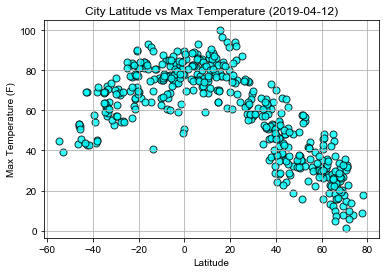

In [7]:
# Temperature (F) vs. Latitude
timestamp = cities_df["Date"][0]
converted_timestamp = datetime.utcfromtimestamp(timestamp)
shortened_timestamp = datetime.date(converted_timestamp)


Lat = pd.to_numeric(cities_df["Lat"])
Temp = pd.to_numeric(cities_df["Max Temp (F)"])

plt.title(f"City Latitude vs Max Temperature ({shortened_timestamp})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.style.use('seaborn')
plt.grid(True)
plt.scatter(x=Lat, y=Temp, edgecolor="black", linewidths=1, marker="o", color="cyan", alpha=0.8, label="City")

# Save the figure
plt.savefig("Analysis/lat_temp.png")

plt.show()

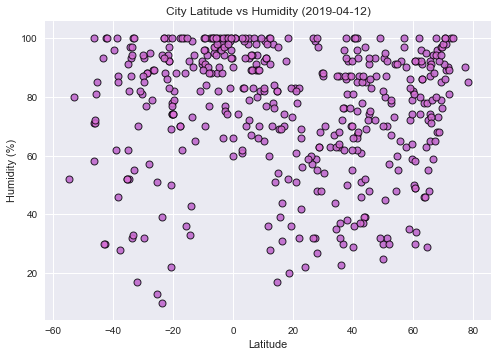

In [8]:
#Build a scatter plot for Latitude vs. Humidity (%)

Hum = pd.to_numeric(cities_df["Humidity (%)"])

with sns.axes_style("darkgrid"):
    sns.regplot(data=cities_df, x=Lat, y=Hum, fit_reg=False)
plt.title(f"City Latitude vs Humidity ({shortened_timestamp})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.scatter(x=Lat, y=Hum, color="orchid", linewidth=1, alpha=0.8, edgecolor="black", marker="o")

# Save the figure
plt.savefig("Analysis/lat_humid.png")

# Show plot
plt.show()

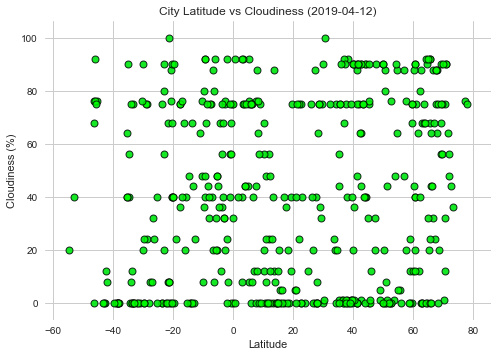

In [9]:
#Build a scatter plot for Latitude vs. Cloudiness (%)

Cloud = pd.to_numeric(cities_df["Cloudiness (%)"])

with sns.axes_style("whitegrid"):
    sns.regplot(data=cities_df, x=Lat, y=Cloud, fit_reg=False)
plt.title(f"City Latitude vs Cloudiness ({shortened_timestamp})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.scatter(x=Lat, y=Cloud, color="lime", alpha=0.8, marker="o", linewidth=1, edgecolor="black")

# Save the figure
plt.savefig("Analysis/lat_cloudy.png")

# Show plot
plt.show()

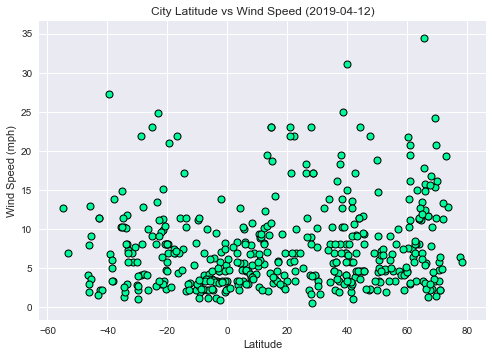

In [10]:
#Build a scatter plot for Latitude vs. Wind Speed (mph)

Wind = pd.to_numeric(cities_df["Wind Speed (mph)"])

with sns.axes_style("darkgrid"):
    sns.regplot(data=cities_df, x=Lat, y=Wind, fit_reg=False)
plt.title(f"City Latitude vs Wind Speed ({shortened_timestamp})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.scatter(x=Lat, y=Wind, color="mediumspringgreen", alpha=1, linewidth=1, edgecolor="black")

# Save the figure
plt.savefig("Analysis/lat_windy.png")

# Show plot
plt.show()